In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 

import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [21]:
# Loading the dataset and glancing at the columns
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [22]:
# Checking the dimensions of the dataset
df.shape

(167, 10)

In [23]:
# Looking at some statistical features of the dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA AND DATA VISUALIZATION

In [24]:
### Checking the percentage of missing values in each column
df.isnull().mean()

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### No missing values in the dataset, that's a good sign

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### All datatypes are suitable as well

### Although, a thing to rectify is that certain columns namely health, exports and imports are represented as percentage of GDP per capita, let's correct this..

In [26]:
df['exports'] = (df['exports']/100) * df['gdpp']
df['imports'] = (df['imports']/100) * df['gdpp']
df['health'] = (df['health']/100) * df['gdpp']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


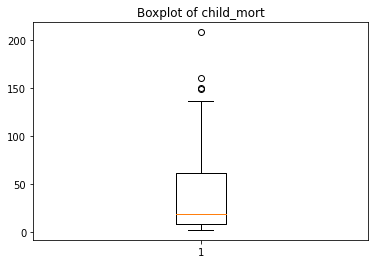

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


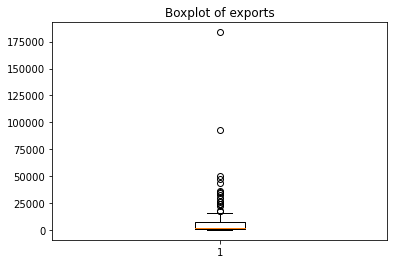

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


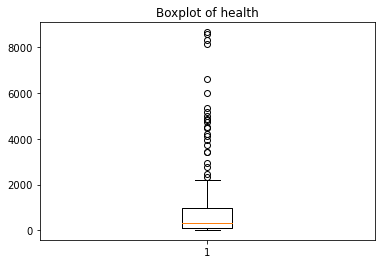

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


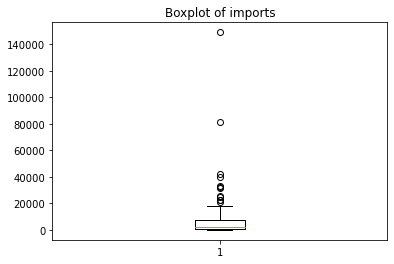

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


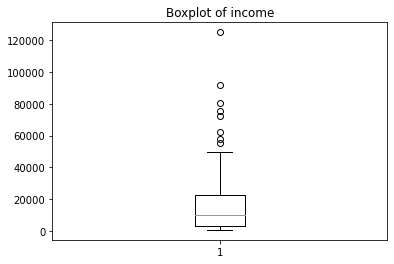

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


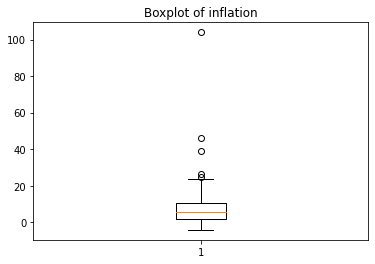

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


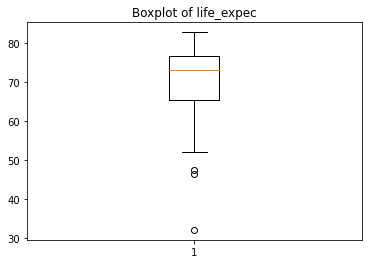

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


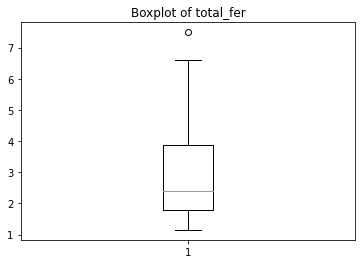

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


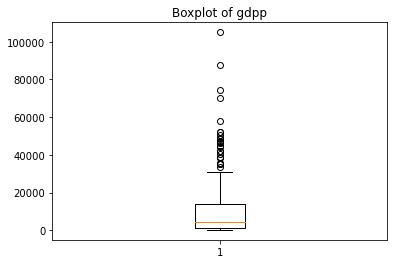

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [27]:
for col in df.iloc[:,1:]:
    plt.boxplot(df['{}'.format(col)])
    plt.title('Boxplot of {}'.format(col))
    plt.show()
    print('ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ')

In [28]:
## Once again to check the values against the specified percentiles
df.describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


#### Clear outlier presence is visible in almost all columns... Hence, getting rid of  outliers

In [29]:
## These negative indicators can be capped, by removing the outliers that perform extremely well in these negative indicators
negative_indicators = ['child_mort','inflation','total_fer']
## Positive indicators to cap the upper range
positive_indicators = [feature for feature in df.columns if feature not in negative_indicators and feature != 'country']

#### For negative indicators removing all values below 25 percentile, and for other indicators using 90 percentile as the cutoff (intuition behind that in report and ppt) and creating a new dataframe df1

In [30]:
# Creating a loop to get rid of outliers from all columns into a new dataframe
# Negative indicators
for col in negative_indicators:
    q1 = df[col].quantile(0.25)
    df1 = df[df[col]>=q1]

# Positive indicators
for col in positive_indicators:
    q3 = df[col].quantile(0.9)
    df1 = df[df[col]<=q3]

In [31]:
df1.shape

(150, 10)

#### Got rid of some stark outliers, visualing again

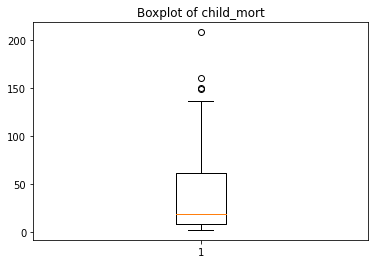

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


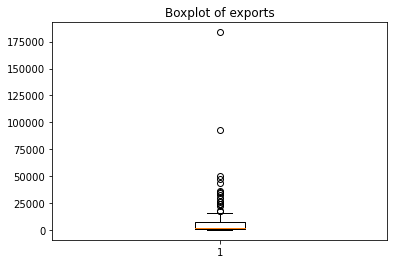

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


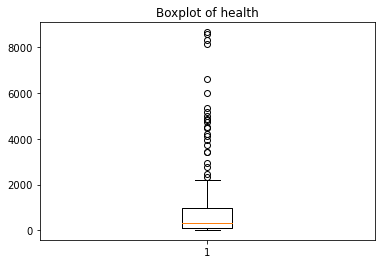

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


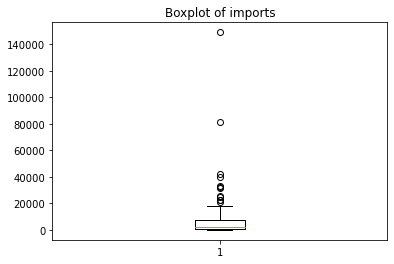

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


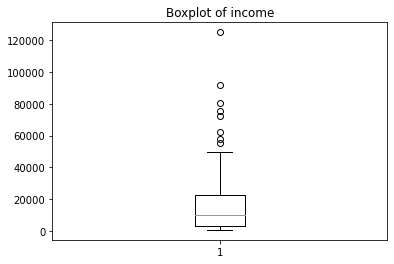

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


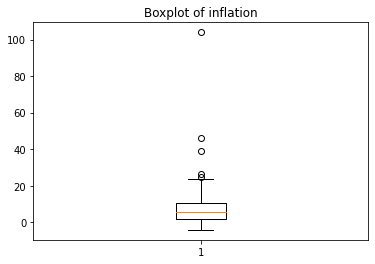

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


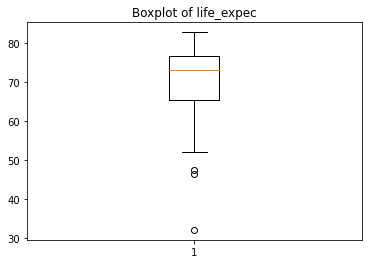

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


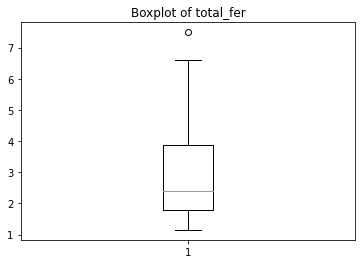

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


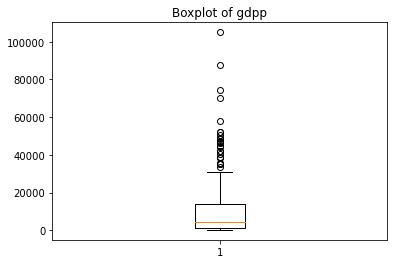

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [32]:
for col in df1.iloc[:,1:]:
    plt.boxplot(df['{}'.format(col)])
    plt.title('Boxplot of {}'.format(col))
    plt.show()
    print('ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ')

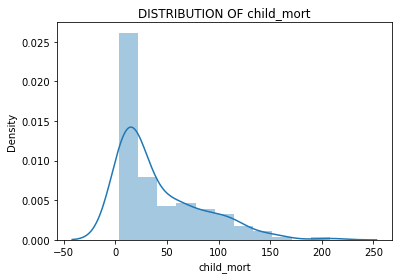

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


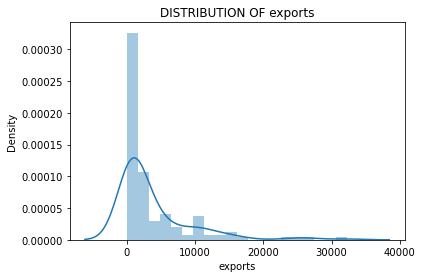

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


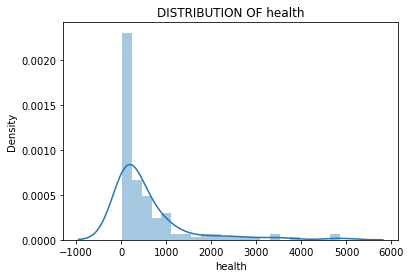

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


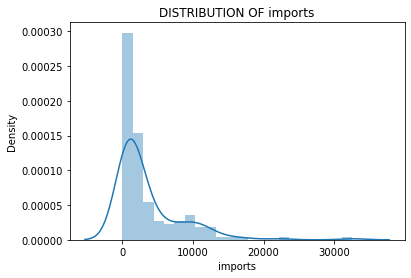

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


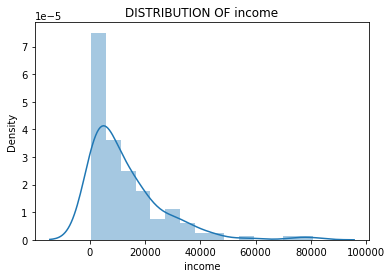

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


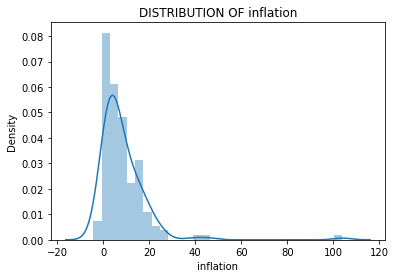

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


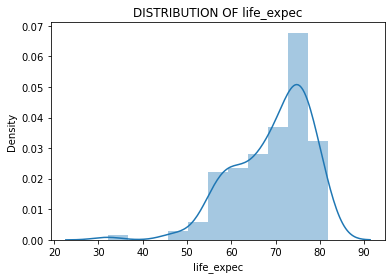

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


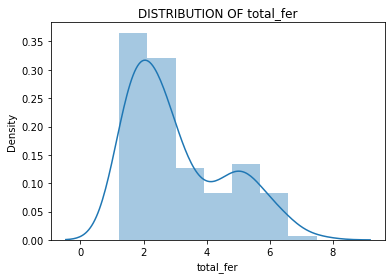

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


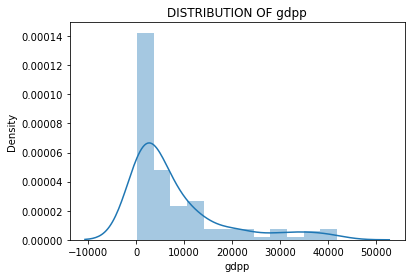

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


In [33]:
## Checking distribution of all the features
for col in df1.iloc[:,1:]:
    sns.distplot(df1['{}'.format(col)])
    plt.title("DISTRIBUTION OF {}".format(col))
    plt.show()
    print('zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz')

#### Some features are normally distributed like imports, exports, health, inflation, while others are bimodally distributed.. But, all of them are skewed, either to the left or to the right.. 

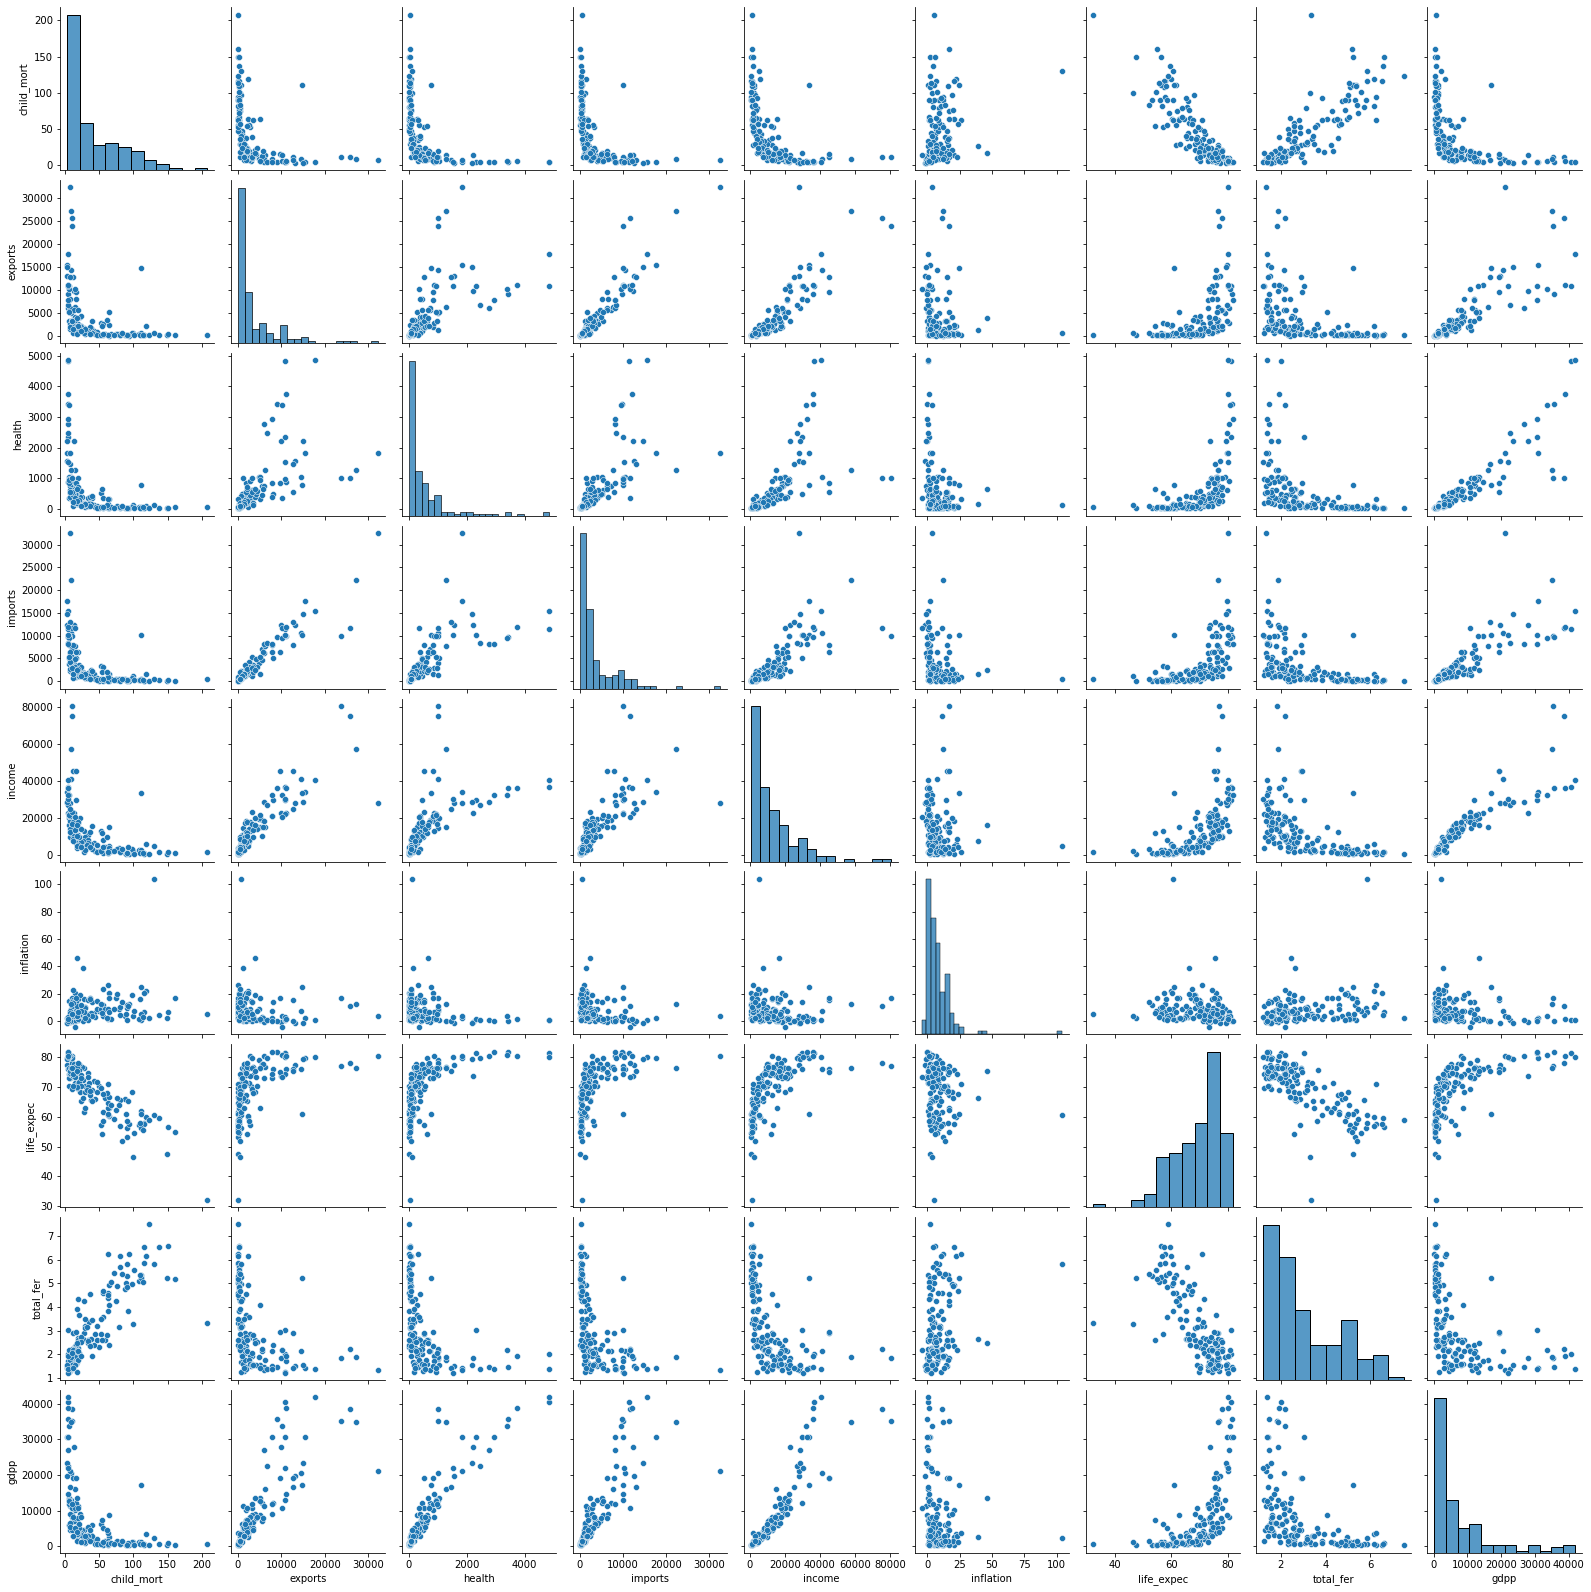

In [34]:
sns.pairplot(df1.iloc[:,1:])
plt.show()

Pairplot shows bivariate scatterplots of all the features with one another

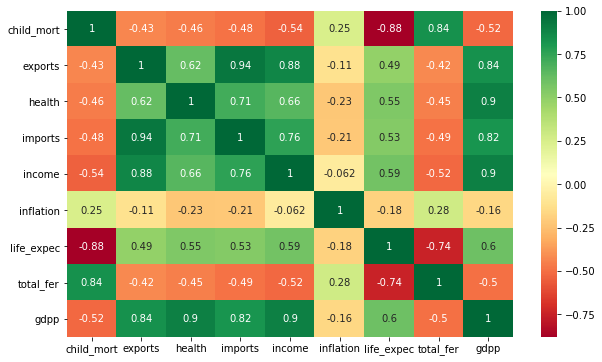

In [35]:
## Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df1.iloc[:,1:].corr(),annot=True,cmap='RdYlGn')
plt.show()

The heatmap shows correlations of a feature with other features

### Moving onto Clustering

In [36]:
df_nolabel = df1.iloc[:,1:]

In [37]:
#Calculating the Hopkins statistic

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
## Checking Hopkins score
hopkins(df_nolabel)

0.9475747850303409

#### Hopkin's statistic implies an insanely high clustering tendency

In [39]:
## Scaling variables
scaler = StandardScaler()
df_nolabel = scaler.fit_transform(df_nolabel)
df_nolabel

array([[ 1.18221299, -0.66056184, -0.60702805, ..., -1.53450305,
         1.78498011, -0.75700739],
       [-0.62742213, -0.46523639, -0.34709818, ...,  0.80602748,
        -0.93190773, -0.39746642],
       [-0.36433659, -0.36354314, -0.4413183 , ...,  0.82931634,
        -0.12400823, -0.35985541],
       ...,
       [-0.46268633, -0.50143764, -0.55217672, ...,  0.4334057 ,
        -0.73644818, -0.68005728],
       [ 0.34869898, -0.60004124, -0.57718998, ..., -0.2186824 ,
         1.03571848, -0.68005728],
       [ 1.00764221, -0.57366092, -0.55632911, ..., -2.02356913,
         1.51133673, -0.66480958]])

In [40]:
df_nolabel = pd.DataFrame(df_nolabel)
df_nolabel.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df_nolabel.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.182213,-0.660562,-0.607028,-0.700107,-0.838681,0.090081,-1.534503,1.784980,-0.757007
1,-0.627422,-0.465236,-0.347098,-0.335100,-0.225430,-0.364864,0.806027,-0.931908,-0.397466
2,-0.364337,-0.363543,-0.441318,-0.458339,-0.006517,0.702189,0.829316,-0.124008,-0.359855
3,1.890331,-0.276347,-0.539523,-0.434432,-0.522473,1.281210,-1.080370,2.006501,-0.454391
4,-0.782323,0.324345,0.190947,0.755669,0.450473,-0.645184,0.864250,-0.619172,0.426926


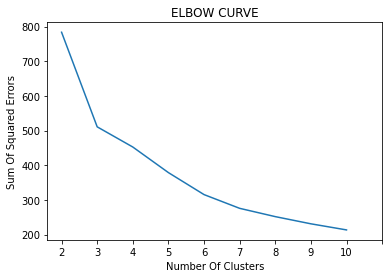

In [41]:
## SSD/Elbow curve
num_clusters = list(range(2,11))
ssd = []
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, max_iter=100)
    kmeans.fit(df_nolabel)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.xticks(np.arange(0,10),num_clusters)
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum Of Squared Errors')
plt.title('ELBOW CURVE')
plt.show()

#### Elbow curve steeps till 3, indicating 3 as the number of clusters

In [42]:
## Silhouette Score
silhouette = []
for n in num_clusters:
    kmeans = KMeans(n_clusters=n,max_iter=100)
    kmeans.fit(df_nolabel)
    sil = silhouette_score(df_nolabel,kmeans.labels_)
    silhouette.append(round(100*(sil),2))
    print("The Silhouette score for {0} clusters is, {1}".format(n,round(100*(sil),2)))

The Silhouette score for 2 clusters is, 45.34
The Silhouette score for 3 clusters is, 41.49
The Silhouette score for 4 clusters is, 41.62
The Silhouette score for 5 clusters is, 35.16
The Silhouette score for 6 clusters is, 37.26
The Silhouette score for 7 clusters is, 29.25
The Silhouette score for 8 clusters is, 28.84
The Silhouette score for 9 clusters is, 28.22
The Silhouette score for 10 clusters is, 27.51


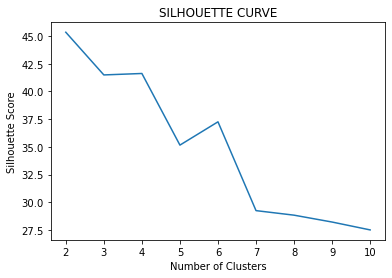

In [43]:
df_sil = pd.DataFrame(silhouette)
plt.plot(df_sil.index,df_sil)
plt.xticks(np.arange(0,9),num_clusters)
plt.title("SILHOUETTE CURVE")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.show()

### Although the silhouette score of 2 clusters is the greatest, but we'll choose 3 clusters as its next best
### The reason for a slight increase in the silhouette score from cluster 3 to 4, is the country "Nigeria", which performs above average on Economic grounds, but way below its average peers and on par with poor countries on Health front, hence there is no sense in making a whole other cluster just for 1 participant, hence "Nigeria" will be grouped with other poor countries in 3 clusters

In [44]:
## Performing K-means
kmeans = KMeans(n_clusters=3,max_iter=100,random_state=100)
kmeans.fit(df_nolabel)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [45]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [46]:
## Number of iterations to reach convergence, should be less than max_iter
kmeans.n_iter_

9

#### Hence, convergence has been reached pretty soon

In [47]:
## Using another random state
kmeans2 = KMeans(n_clusters=3,max_iter=100,random_state=0)
kmeans2.fit(df_nolabel)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [48]:
## Checking if convergence achieved
kmeans2.n_iter_

9

In [50]:
## Labels from different random state
kmeans2.labels_

array([0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0])

The outputs are somewhat similar, although cluster numbers have been shuffled. The AVERAGE countries' cluster shifted from 1 to 2.. Moving forward with random state 100

In [51]:
df1['K-Means_cluster'] = kmeans.labels_
df1['K-Means_cluster']=df1['K-Means_cluster'].map({0:'POOR',1:'AVERAGE',2:'RICH'})

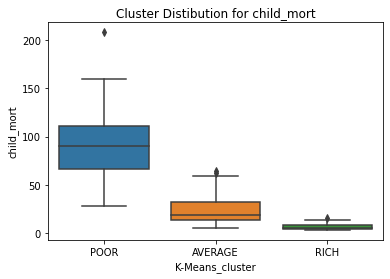

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


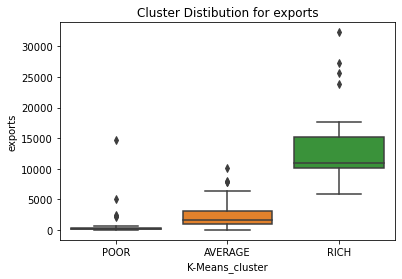

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


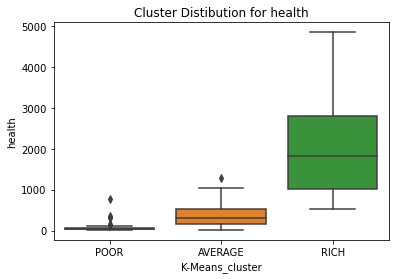

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


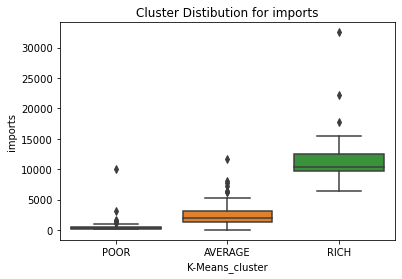

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


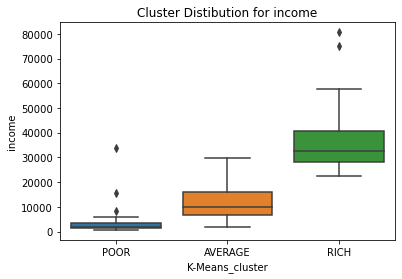

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


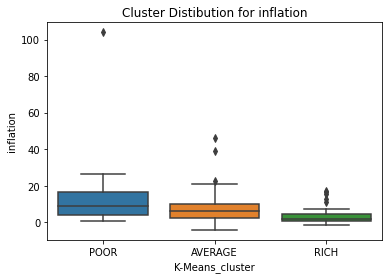

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


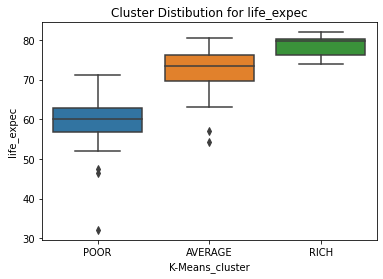

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


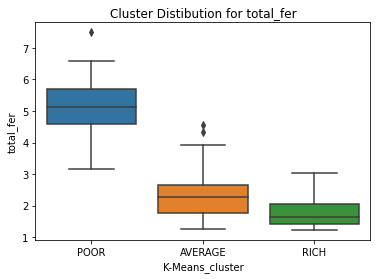

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


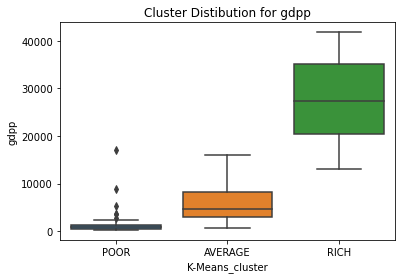

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [52]:
for col in df1.iloc[:,1:-1]:
    sns.boxplot(x=df1['K-Means_cluster'],y=df['{}'.format(col)])
    plt.title("Cluster Distibution for {}".format(col))
    plt.show()
    print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")

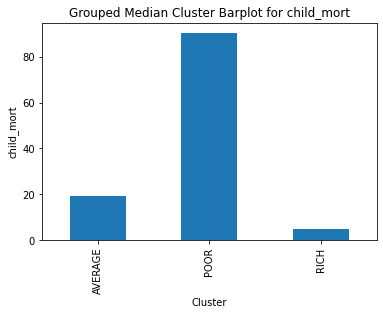

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


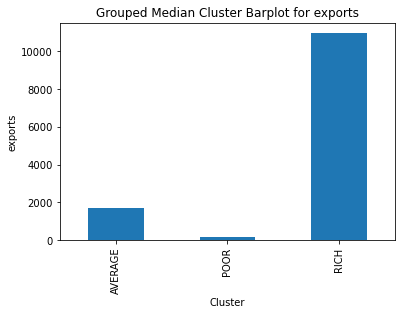

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


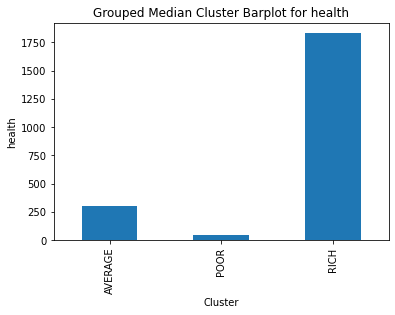

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


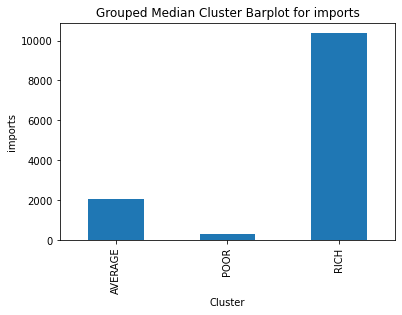

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


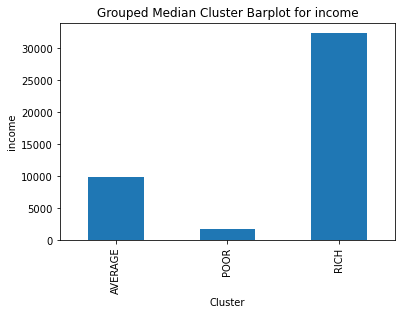

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


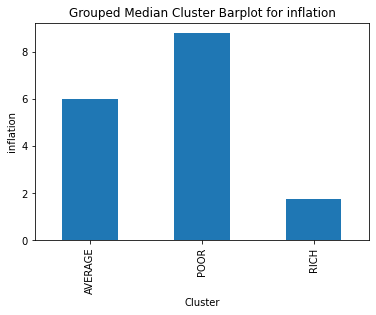

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


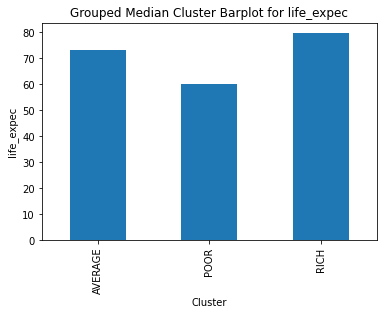

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


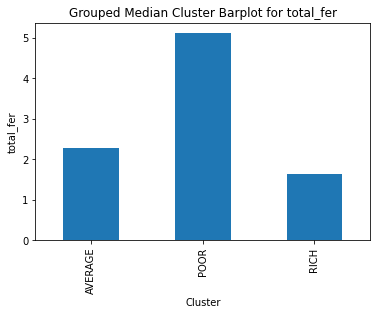

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


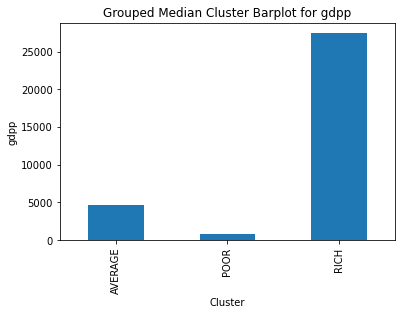

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [53]:
for col in df1.iloc[:,1:-1]:
    df1.groupby("K-Means_cluster")[col].median().plot.bar()
    plt.title("Grouped Median Cluster Barplot for {}".format(col))
    plt.ylabel(col)
    plt.xlabel("Cluster")
    plt.show()
    print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")

#### The results of above barplots and boxplots are identical and prove that clusters have formed appropriately

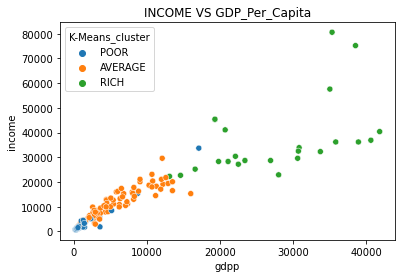

In [54]:
sns.scatterplot(data = df1,x='gdpp',y='income',hue='K-Means_cluster')
plt.title('INCOME VS GDP_Per_Capita')
plt.show()

#### Above scatterplot shows how Poor(Blue) countries have lesser GDP per capita and low income, while the Rich(Green) have higher GDP per capita and income levels.. 

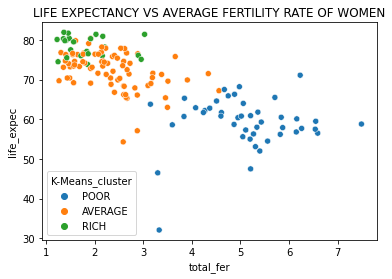

In [55]:
sns.scatterplot(data=df1,x='total_fer',y='life_expec',hue='K-Means_cluster')
plt.title('LIFE EXPECTANCY VS AVERAGE FERTILITY RATE OF WOMEN')
plt.show()

#### Above scatterplot shows how Rich(Green) have higher life expectancy and lower total fertility rates, on the other hand, Poor(Blue) have lower life expectancy and higher total fertility rates

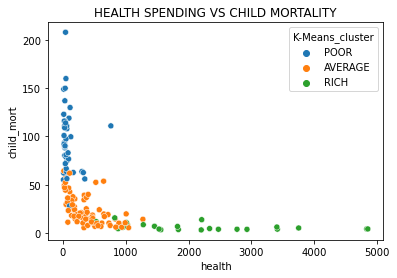

In [56]:
sns.scatterplot(data=df1,x='health',y='child_mort',hue='K-Means_cluster')
plt.title('HEALTH SPENDING VS CHILD MORTALITY')
plt.show()

#### Above scatterplot shows how Rich(Green) have higher health spendings and lower child mortality rates, on the other hand, Poor(Blue) have lower health spendings and higher child mortality rates...

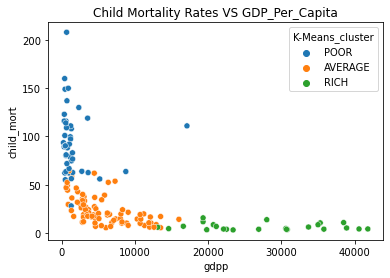

In [60]:
sns.scatterplot(data = df1,x='gdpp',y='child_mort',hue='K-Means_cluster')
plt.title('Child Mortality Rates VS GDP_Per_Capita')
plt.show()

#### Similar results as above, rich countries(Green) are better than poor ones(Blue) in every way imaginable 

### Top 10 countries in NEED according to K-means Clustering sorted as instructed

In [57]:
df_poor=(df1[df1['K-Means_cluster']=="POOR"]).sort_values(by=['gdpp',"child_mort",'income'],ascending=[True,False,True]).head(10)
df_poor

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_cluster
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,POOR
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,POOR
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,POOR
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,POOR
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,POOR
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,POOR
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,POOR
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,POOR
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,POOR
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,POOR


# K-Means Algorithm has worked spectacularly, all boxplots show all the parameters right where they're needed 

## Moving onto Hierarchical Cluster

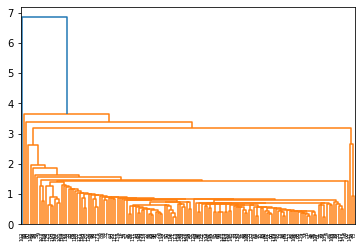

In [62]:
single_link = linkage(df_nolabel, method='single', metric='euclidean')
dendrogram(single_link)
plt.show()

### Not interpreteble, moving onto complete and average linkage

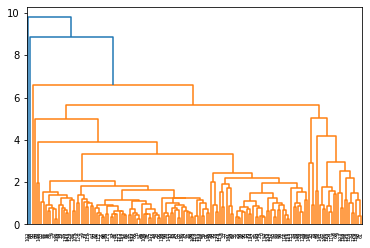

In [63]:
avg_link = linkage(df_nolabel, method='average', metric='euclidean')
dendrogram(avg_link)
plt.show()

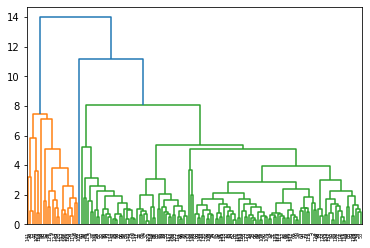

In [64]:
complete_link = linkage(df_nolabel, method='complete', metric='euclidean')
dendrogram(complete_link)
plt.show()

### Complete Linkage is making some sense

#### Nigeria, here, is the Blue line carried down to the x-axis, no matter what we did, Nigeria was to be a separate cluster.And, hence, this made us classify our results to 4 clusters, despite the 4th cluster having only 1 observation.

In [65]:
df1["Tree_cluster"] = cut_tree(complete_link, n_clusters=4).reshape(-1, )

In [66]:
df1[df1["Tree_cluster"]==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_cluster,Tree_cluster
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,POOR,3


#### Above cell proves that Cluster 3 has only 1 observation, hence its moot to have another cluster just for this

In [67]:
### Mapping values in the Tree cluster 
df1['Tree_cluster'] = df1['Tree_cluster'].map({0:'POORER',1:'AVERAGE',2:'RICH',3:'POOR'})

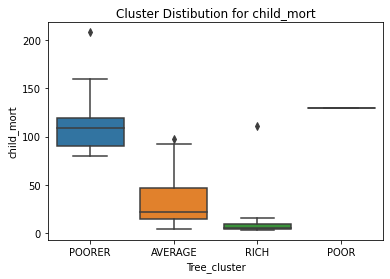

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


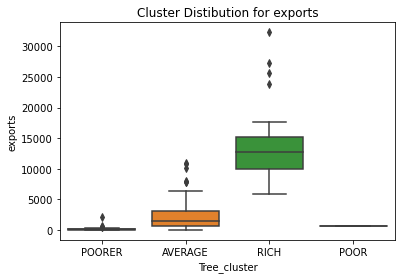

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


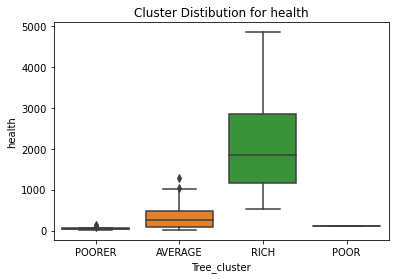

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


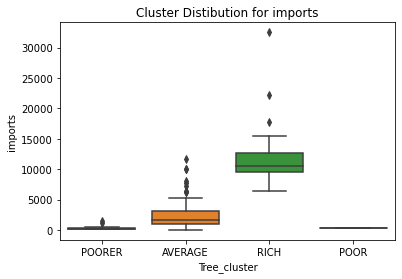

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


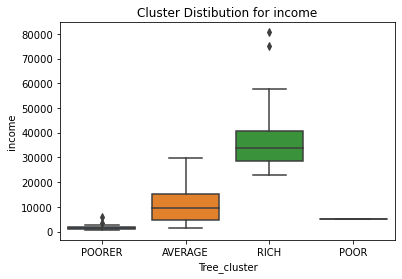

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


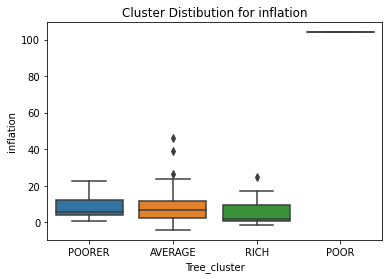

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


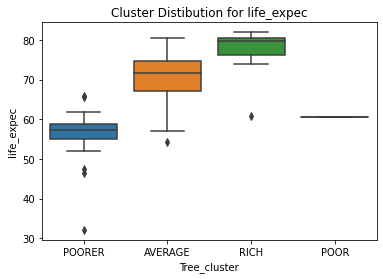

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


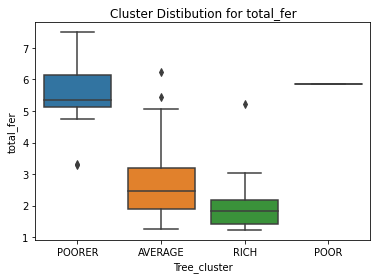

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


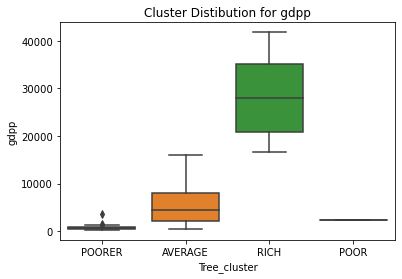

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [68]:
for col in df1.iloc[:,1:-2]:
    sns.boxplot(x=df1['Tree_cluster'],y=df1['{}'.format(col)])
    plt.title("Cluster Distibution for {}".format(col))
    plt.show()
    print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")


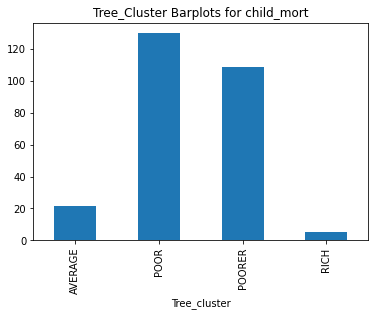

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


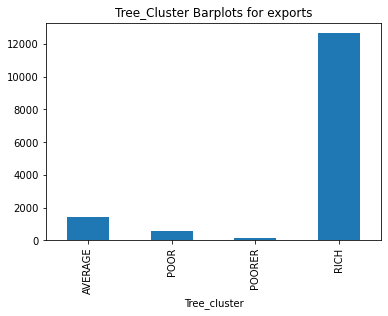

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


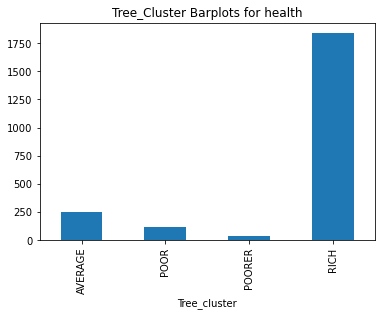

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


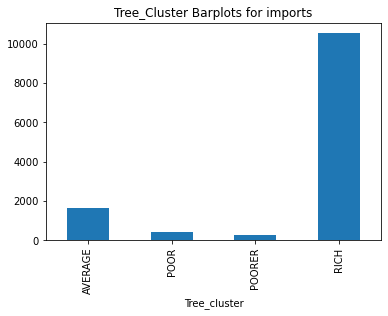

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


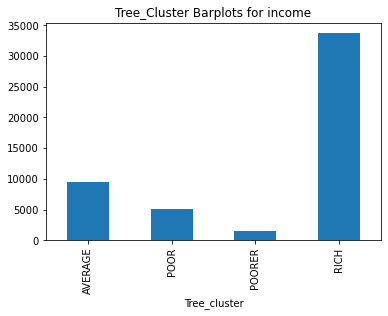

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


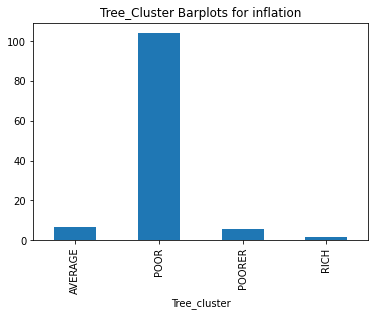

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


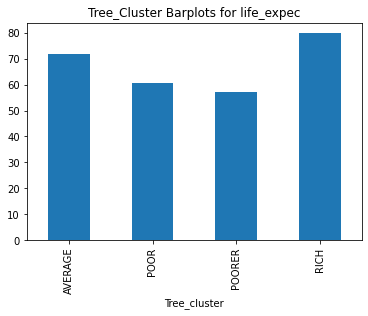

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


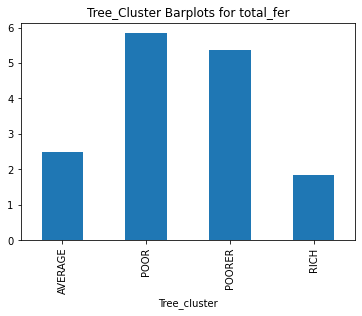

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


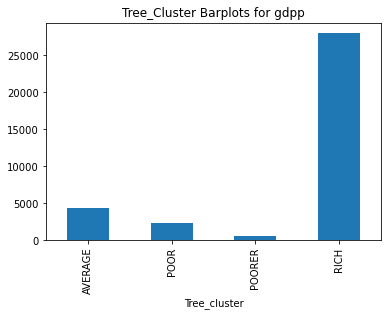

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [69]:
for col in df1.iloc[:,1:-2]:
    df1.groupby("Tree_cluster")[col].median().plot.bar()
    plt.title("Tree_Cluster Barplots for {}".format(col))
    plt.show()
    print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")


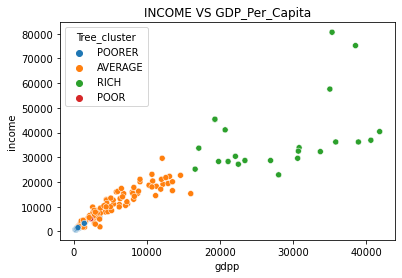

In [70]:
sns.scatterplot(data = df1,x='gdpp',y='income',hue='Tree_cluster')
plt.title('INCOME VS GDP_Per_Capita')
plt.show()

#### Above scatterplot shows how Poor(Blue and Red) countries have lesser GDP per capita and low income, while the Rich(Green) have higher GDP per capita and income levels.. 

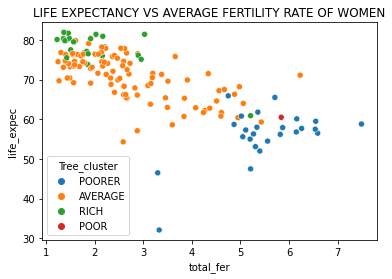

In [71]:
sns.scatterplot(data=df1,x='total_fer',y='life_expec',hue='Tree_cluster')
plt.title('LIFE EXPECTANCY VS AVERAGE FERTILITY RATE OF WOMEN')
plt.show()

#### Above scatterplot shows how Rich(Green) have higher life expectancy and lower total fertility rates, on the other hand, Poor(Blue and Red) have lower life expectancy and higher total fertility rates

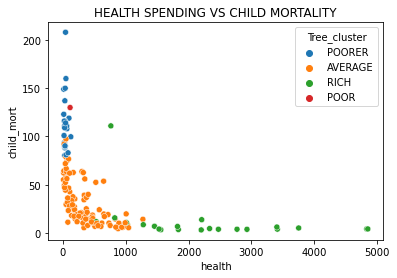

In [72]:
sns.scatterplot(data=df1,x='health',y='child_mort',hue='Tree_cluster')
plt.title('HEALTH SPENDING VS CHILD MORTALITY')
plt.show()

#### Above scatterplot shows how Rich(Green) have higher health spendings and lower child mortality rates, on the other hand, Poor(Blue and Red) have lower health spendings and higher child mortality rates...

### Top 10 Countries in NEED of aid as per Hierarchical clustering

In [73]:
df_poor2 = (df1[(df1['Tree_cluster']=='POORER') + (df1['Tree_cluster']=='POOR')]).sort_values(by=['gdpp',"child_mort",'income'],ascending=[True,False,True]).head(10)
df_poor2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_cluster,Tree_cluster
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,POOR,POORER
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,POOR,POORER
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,POOR,POORER
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,POOR,POORER
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,POOR,POORER
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,POOR,POORER
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,POOR,POORER
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,POOR,POORER
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.18,58.7,4.87,488,POOR,POORER
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,POOR,POORER


#### Even if Nigeria was one of the Top 10, funding it is still useless as the problem in Nigeria is not lack of funds, but the proper usage of those funds

In [74]:
## Top 5 countries are same in both clustering outputs, which are
df_poor.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_cluster
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,POOR
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,POOR
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,POOR
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,POOR
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,POOR


# THESE ARE THE SHORTLISTED 5 COUNTRIES